# Testing And Predicting

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model("lstm_saved_model.keras")

In [3]:
# model = joblib.load("lstm_saved_model.sav")

In [4]:
data_training=pd.read_csv("data_training")
data_training.shape

(3964, 1)

In [5]:
data_testing=pd.read_csv("data_testing")
data_testing.shape

(992, 1)

In [6]:
# total_size=data_training.shape[0]+data_testing.shape[0]

In [7]:
past100=data_training.tail(100)

In [8]:
final=[past100,data_testing]

In [9]:
data_testing_n=pd.concat(final)

In [10]:
scale=MinMaxScaler(feature_range=(0,1))

In [11]:
test_data=scale.fit_transform(data_testing_n)
test_data.shape

(1092, 1)

In [12]:
x_test=[]
y_test=[]

In [13]:
for i in range(100,test_data.shape[0]):
    x_test.append(test_data[i-100:i])
    y_test.append(test_data[i,0])
x_test=np.array(x_test)
y_test=np.array(y_test)
x_test.shape,y_test.shape

((992, 100, 1), (992,))

In [14]:
y_pred=model.predict(x_test)
y_pred.shape

31/31 [==============================] - 3s 69ms/step


(992, 1)

In [15]:
scale_factor=1/scale.scale_
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

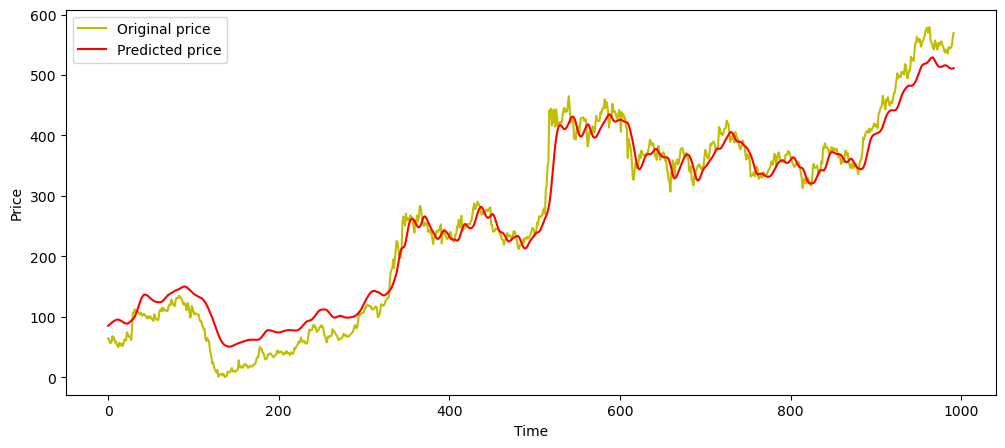

In [16]:
plt.figure(figsize=(12,5))
plt.plot(y_test,'y' ,label='Original price')
plt.plot(y_pred,'r' ,label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
next_days=[]
test_size_new=test_data.shape[0]
past_100_days=test_data[test_size_new-100:test_size_new]
for i in range(0,5):
    last_100_days=past_100_days[i:100+i]
    last_100_days=np.reshape(last_100_days,(1,100,1))
    pred_1=model.predict(last_100_days)
    next_days=np.append(next_days,pred_1*scale_factor)
    past_100_days=np.append(past_100_days,pred_1)

1/1 [==============================] - 0s 31ms/step


In [30]:
next_days

array([512.57959887, 513.46784526, 513.07621343, 511.12440431,
       507.8510966 ])

In [31]:
final_pred=np.append(y_pred,next_days)
y_pred.shape,next_days.shape,final_pred.shape

((992, 1), (5,), (997,))

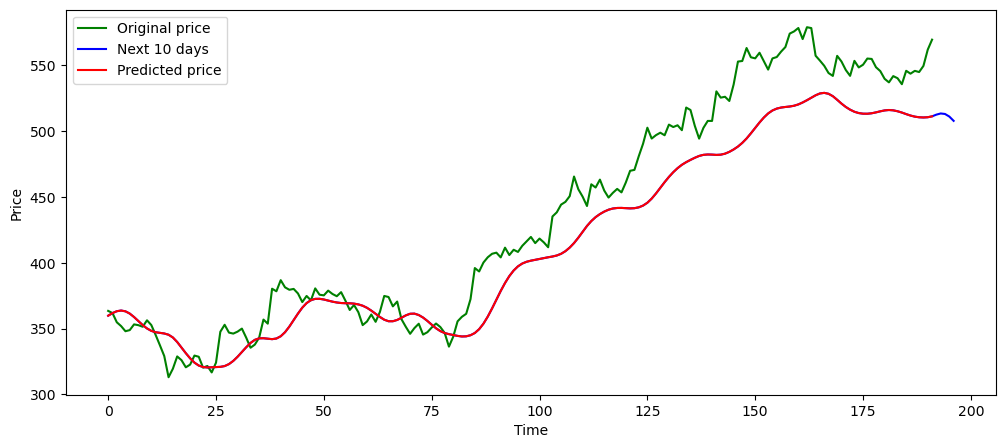

In [37]:
plt.figure(figsize=(12,5))
plt.plot(y_test[800:],'g' ,label='Original price')
plt.plot(final_pred[800:],'b' ,label='Next 10 days')
plt.plot(y_pred[800:],'r' ,label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()